<a href="https://colab.research.google.com/github/sofiaaic/PrediccionTendenciasPoliticasChile/blob/joaquin/notebooks/extract_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acá dejaremos el codigo para extraer los datos RAW.

In [1]:
# (Opcional) instala motores para Excel si hace falta
#!pip -q install openpyxl


In [2]:
# 1) Montar Drive
from google.colab import drive

CARPETA = '/content/drive/MyDrive/data_votantes_chile'  # ajusta a tu ruta
drive.mount('/content/drive')  # autoriza con tu cuenta

Mounted at /content/drive


In [3]:
extract_data = False

In [4]:

# 2) Configurar ruta de carpeta en tu Drive
#    Ejemplo: "Mi unidad/Proyectos/Excels"
import os, glob
import pandas as pd

CARPETA = '/content/drive/MyDrive/data_votantes_chile'  # ajusta a tu ruta


# 3) Buscar archivos .xlsx (evitar temporales ~$.xlsx)
rutas = [p for p in glob.glob(os.path.join(CARPETA, '**', '*.xlsx'), recursive=True)
         if not os.path.basename(p).startswith('~$')]
# ===============================================================
# 4) Leer y concatenar las hojas "Votación en Chile"
# ===============================================================
dfs = []


if extract_data:

    for ruta in rutas:
        nombre_archivo = os.path.basename(ruta)
        print(f"\n🔍 Leyendo archivo: {nombre_archivo}")

        try:
            df = pd.read_excel(
                ruta,
                sheet_name='Votación en Chile',
                skiprows=6,
                engine='openpyxl'
            )
            df['__archivo_origen'] = nombre_archivo
            dfs.append(df)
            print(f"✅ Leído correctamente: {nombre_archivo} ({df.shape[0]} filas)")

        except ValueError as e:
            # Si la hoja no existe, mostramos las disponibles
            print(f"⚠️ No se encontró la hoja 'Votación en Chile' en {nombre_archivo}")
            try:
                xls = pd.ExcelFile(ruta, engine='openpyxl')
                print("   🗒️ Hojas disponibles:", xls.sheet_names)
            except Exception as e2:
                print(f"   ❌ No se pudieron listar las hojas: {e2}")
        except Exception as e:
            print(f"❌ Error general leyendo {nombre_archivo}: {e}")

    # ===============================================================
    # 5) Concatenar todos los DataFrames válidos
    # ===============================================================
    if dfs:
        df_total = pd.concat(dfs, ignore_index=True)
        print(f"\n✅ Total concatenado: {df_total.shape[0]} filas, {df_total.shape[1]} columnas")
    else:
        print("\n⚠️ No se pudieron leer hojas válidas.")
        df_total = pd.DataFrame()

    # ===============================================================
    # 6) Guardar DataFrame final como Pickle (solo si no existe)
    # ===============================================================

    if not df_total.empty:
        ruta_salida = os.path.join(CARPETA, 'df_votacion_chile.pkl')

        if not os.path.exists(ruta_salida):
            df_total.to_pickle(ruta_salida)
            print(f"💾 DataFrame guardado en: {ruta_salida}")
        else:
            print(f"⚠️ El archivo Pickle ya existe en: {ruta_salida}")
            print("   No se guardó para evitar sobrescribirlo.")
    else:
        print("⚠️ No se guardó el Pickle (DataFrame vacío).")


In [6]:
# drive/MyDrive/df_votacion_chile.pkl
import pandas as pd

# Ruta al archivo Pickle
ruta = "/content/drive/MyDrive/data_votantes_chile/df_votacion_chile.pkl"  # ajusta si tu Drive no está montado en /content

# Cargar y mostrar el DataFrame
try:
    df = pd.read_pickle(ruta)
    print("✅ DataFrame cargado correctamente.")
    display(df.head())
except FileNotFoundError:
    print(f"❌ No se encontró el archivo en la ruta: {ruta}")
except Exception as e:
    print(f"⚠️ Error al cargar el Pickle: {e}")

✅ DataFrame cargado correctamente.


,Nro Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Mesa,Nro.Voto,Nombres,Primer apellido,Segundo apellido,Votos,Cargo,__archivo_origen,Nominado,Nominados
0,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20M,1.0,GABRIEL,BORIC,FONT,71,ELECTO,2021_12_Presidencial_2V_Datos_Eleccion.xlsx,NaN,NaN
1,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20M,2.0,JOSE ANTONIO,KAST,RIST,92,NaN,2021_12_Presidencial_2V_Datos_Eleccion.xlsx,NaN,NaN
2,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20M,NaN,VOTOS NULOS,NaN,NaN,1,NaN,2021_12_Presidencial_2V_Datos_Eleccion.xlsx,NaN,NaN
3,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20M,NaN,VOTOS EN BLANCO,NaN,NaN,0,NaN,2021_12_Presidencial_2V_Datos_Eleccion.xlsx,NaN,NaN
4,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,21M,1.0,GABRIEL,BORIC,FONT,82,ELECTO,2021_12_Presidencial_2V_Datos_Eleccion.xlsx,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536643 entries, 0 to 1536642
Data columns (total 17 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Nro Región                  1536643 non-null  int64  
 1   Región                      1536643 non-null  object 
 2   Circunscripción senatorial  1536643 non-null  object 
 3   Distrito                    1536643 non-null  object 
 4   Comuna                      1536643 non-null  object 
 5   Circunscripción electoral   1536643 non-null  object 
 6   Local                       1536643 non-null  object 
 7   Mesa                        1536643 non-null  object 
 8   Nro.Voto                    1084291 non-null  float64
 9   Nombres                     1536643 non-null  object 
 10  Primer apellido             1084291 non-null  object 
 11  Segundo apellido            1084291 non-null  object 
 12  Votos                       1438123 non-null  object 
 1

In [12]:
# -*- coding: utf-8 -*-
import re

import unicodedata
import pandas as pd
import numpy as np

# =========================================================
# 0) Cargar datos (ajusta la ruta si ya lo tienes en memoria)
# =========================================================
# df = pd.read_pickle("/drive/MyDrive/df_votacion_chile.pkl")

# Si ya tienes 'df' en memoria, comenta la línea de arriba.

# =========================================================
# 1) Helpers
# =========================================================
def _norm(s: str) -> str:
    """Normaliza: lower, sin tildes, trim y colapsa espacios."""
    if not isinstance(s, str):
        return ""
    s = s.strip().lower()
    s = unicodedata.normalize("NFD", s)
    s = "".join(ch for ch in s if unicodedata.category(ch) != "Mn")
    s = re.sub(r"\s+", " ", s)
    return s

def _parse_election_from_filename(fname: str):
    """
    '__archivo_origen' ejemplos:
      '2021_12_Presidencial_2V_Datos_Eleccion.xlsx'
      '2017_11_Presidencial_1V_...'
    Devuelve: año(int), eleccion(str)
    """
    if not isinstance(fname, str):
        return None, None
    # Año = primeros 4 dígitos
    m_year = re.search(r"(^|\D)(20\d{2}|19\d{2})(\D|_)", fname)
    year = int(m_year.group(2)) if m_year else None

    # Extraer etiqueta de elección (ej: 'Presidencial_2V', 'Presidencial_1V', 'Primarias', 'Plebiscito', etc.)
    # Tomamos lo que esté entre el año y '_Datos' o '.xlsx'
    # Patrón base: YYYY_MM_(TEXTO)_Datos...
    m_kind = re.search(r"\d{4}_\d{2}_([^_]+(?:_[^_]+)*)_Datos", fname)
    eleccion = m_kind.group(1) if m_kind else None
    return year, eleccion

# =========================================================
# 2) Mapeo candidato -> sector
#    Clave de mapeo: "nombres primerapellido segundoapellido" normalizado
#    (Completa según tus datasets históricos)
# =========================================================
MAP_CANDIDATO_SECTOR = {
    # Presidencial 2021 (2V)
    "gabriel boric font": "izquierda",
    "jose antonio kast rist": "derecha",

    # Presidencial 2021 (1V) y 2017, etc. (ejemplos)
    "sebastian pinera echenique": "derecha",
    "alejandro guillier alvarez": "izquierda",
    "beatriz sanchez muñoz": "izquierda",
    "yasna provoste campillay": "centro",
    "marco enriquez ominami gumucio": "izquierda",
    "franco parisi fernandez": "independiente",  # puedes moverlo a derecha/centro según tu criterio
    "daniel jadue jadue": "izquierda",
    "evelyn matthei fornet": "derecha",
    "joaquin lavin infante": "derecha",
    "ignacio briones rojas": "centro",
    "sebastian sichel ramirez": "derecha",
    # Agrega constituyentes/alcaldías/etc. si esos archivos están en tu pool
}

EXCLUIR_FILAS = {"votos nulos", "votos en blanco", "nulos", "blancos"}

# =========================================================
# 3) Limpieza y normalización básica
# =========================================================
df2 = df.copy()

# Tipos
# 'Votos' viene como object; a veces son strings numéricos
# Forzamos NaN y luego int
df2["Votos"] = pd.to_numeric(df2["Votos"], errors="coerce")

# Construir 'candidato' y clave normalizada
for col in ["Nombres", "Primer apellido", "Segundo apellido"]:
    df2[col] = df2[col].fillna("")

df2["candidato_raw"] = (df2["Nombres"].astype(str).str.strip() + " " +
                        df2["Primer apellido"].astype(str).str.strip() + " " +
                        df2["Segundo apellido"].astype(str).str.strip()).str.strip()

df2["candidato_norm"] = df2["candidato_raw"].apply(_norm)

# Filtrar filas vacías/administrativas (nulos/blancos)
df2 = df2[~df2["Nombres"].str.upper().isin({s.upper() for s in EXCLUIR_FILAS})].copy()

# Parsear año/elección desde '__archivo_origen'
df2["year"], df2["eleccion"] = zip(*df2["__archivo_origen"].map(_parse_election_from_filename))

# =========================================================
# 4) Asignar sector por fila usando el mapeo
# =========================================================
def asignar_sector(candidato_norm: str) -> str | None:
    if not candidato_norm:
        return None
    return MAP_CANDIDATO_SECTOR.get(candidato_norm)

df2["sector"] = df2["candidato_norm"].map(asignar_sector)

# Algunas filas pueden no mapear (otros comicios/cargos). Las descartamos por ahora.
df2 = df2[~df2["sector"].isna()].copy()

# =========================================================
# 5) Agregar por comuna x elección x sector
#    Ojo: hay datos a nivel de mesa. Sumamos 'Votos'.
# =========================================================
# Normalizar nombres territoriales para evitar problemas de mayúsculas/tildes
for col in ["Región", "Comuna", "Circunscripción electoral", "Local", "Mesa"]:
    df2[col] = df2[col].astype(str).str.strip()

df_agg = (df2
          .groupby(["year", "eleccion", "Región", "Comuna", "sector"], as_index=False)["Votos"]
          .sum())

# Total de votos por comuna/elección (para shares)
totales = (df_agg.groupby(["year", "eleccion", "Región", "Comuna"], as_index=False)["Votos"]
           .sum()
           .rename(columns={"Votos": "Votos_Totales"}))

df_agg = df_agg.merge(totales, on=["year", "eleccion", "Región", "Comuna"], how="left")
df_agg["share"] = df_agg["Votos"] / df_agg["Votos_Totales"]

# Pivot de shares por sector
pivot_shares = (df_agg
                .pivot_table(index=["year", "eleccion", "Región", "Comuna"],
                             columns="sector", values="share", fill_value=0.0)
                .reset_index())
# Asegurar columnas presentes
for c in ["izquierda", "centro", "derecha", "independiente"]:
    if c not in pivot_shares.columns:
        pivot_shares[c] = 0.0

# Etiqueta de sector ganador
sector_cols = ["izquierda", "centro", "derecha", "independiente"]
pivot_shares["label_ganador"] = pivot_shares[sector_cols].idxmax(axis=1)

# =========================================================
# 6) Features históricas (lag) para predicción
#    Idea simple: usar shares de la(s) elección(es) previa(s) por comuna.
# =========================================================
pivot_shares = pivot_shares.sort_values(["Comuna", "year", "eleccion"])
# Creamos un orden temporal simple: (year, eleccion) -> rank por comuna
pivot_shares["t"] = pivot_shares.groupby("Comuna").cumcount()

# Lags por comuna
def add_lag_cols(df_c, cols, lag=1, suffix=None):
    suffix = suffix or f"lag{lag}"
    out = df_c.copy()
    for col in cols:
        out[f"{col}_{suffix}"] = out.groupby("Comuna")[col].shift(lag)
    return out

features = pivot_shares.copy()
for L in [1, 2]:
    features = add_lag_cols(features, sector_cols, lag=L, suffix=f"lag{L}")

# Drop filas sin historial (NaN en lags)
mask_hist = features[[f"{c}_lag1" for c in sector_cols]].notna().all(axis=1)
features_model = features[mask_hist].copy()

# Target y X
target = features_model["label_ganador"].copy()
feature_cols = []
for c in sector_cols:
    feature_cols += [f"{c}_lag1", f"{c}_lag2"]
X = features_model[feature_cols].copy()

# =========================================================
# 7) Split temporal y modelo simple
# =========================================================
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, f1_score
from sklearn.model_selection import GroupKFold
import numpy as np

sector_cols = ["izquierda","centro","derecha","independiente"]
feature_cols = [f"{c}_lag1" for c in sector_cols] + [f"{c}_lag2" for c in sector_cols]

# Si vas a imputar, puedes NO filtrar por NaN; el Imputer se encarga
X_all = features[feature_cols].copy()
y_all = features["label_ganador"].copy()
years_all = features["year"].copy()

pipe = Pipeline(steps=[
    ("imp", SimpleImputer(strategy="constant", fill_value=0.0)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))  # sin multi_class (deprecado)
])

# ---------- 1) Elegir test_year con ≥2 clases en train y test ----------
yrs = sorted(features["year"].dropna().unique())
chosen_test_year = None

for test_year in yrs[::-1]:  # del más reciente hacia atrás
    test_mask = (years_all == test_year)
    train_mask = (years_all < test_year)
    if train_mask.sum() == 0 or test_mask.sum() == 0:
        continue
    y_train, y_test = y_all[train_mask], y_all[test_mask]
    if y_train.nunique() >= 2 and y_test.nunique() >= 2:
        chosen_test_year = test_year
        break

if chosen_test_year is not None:
    print(f"[OK] Test year elegido: {chosen_test_year}")
    train_mask = (years_all < chosen_test_year)
    test_mask  = (years_all == chosen_test_year)

    X_train, y_train = X_all[train_mask], y_all[train_mask]
    X_test,  y_test  = X_all[test_mask],  y_all[test_mask]

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print("=== Balanced Accuracy ===")
    print(balanced_accuracy_score(y_test, y_pred))
    print("\n=== Reporte ===")
    print(classification_report(y_test, y_pred))
    print("\n=== Matriz de Confusión ===")
    print(confusion_matrix(y_test, y_pred, labels=["izquierda","centro","derecha","independiente"]))

    # Inferencia (último snapshot por comuna)
    X_infer = (features.sort_values(["Comuna","t"])
               .groupby("Comuna")
               .tail(1)[feature_cols]
               .copy())
    pred_sector = pipe.predict(X_infer)
    proba_sector = pipe.predict_proba(X_infer)
    pred_df = (features.sort_values(["Comuna","t"])
               .groupby("Comuna")
               .tail(1)[["Región","Comuna","year","eleccion"]]
               .reset_index(drop=True))
    pred_df["pred_sector"] = pred_sector
    pred_df[[f"proba_{c}" for c in pipe.classes_]] = proba_sector
    print("\n=== Predicción (último snapshot por comuna) ===")
    print(pred_df.head(10))

else:
    # ---------- 2) Fallback: GroupKFold por año (temporal) ----------
    print("[WARN] No hay año de test con ≥2 clases en train y test. Usando GroupKFold por año.")
    gkf = GroupKFold(n_splits=min(5, len(yrs)))
    accs, f1s = [], []

    for fold, (tr_idx, te_idx) in enumerate(gkf.split(X_all, y_all, groups=years_all), start=1):
        X_tr, X_te = X_all.iloc[tr_idx], X_all.iloc[te_idx]
        y_tr, y_te = y_all.iloc[tr_idx], y_all.iloc[te_idx]

        # Si en este fold el train tiene <2 clases, salta fold
        if y_tr.nunique() < 2 or y_te.nunique() < 2:
            print(f"[Fold {fold}] Saltado por clases insuficientes (train={y_tr.nunique()}, test={y_te.nunique()})")
            continue

        pipe.fit(X_tr, y_tr)
        y_hat = pipe.predict(X_te)

        accs.append(balanced_accuracy_score(y_te, y_hat))
        f1s.append(f1_score(y_te, y_hat, average="macro"))

        print(f"[Fold {fold}] Acc(balanceada)={accs[-1]:.3f}  F1(macro)={f1s[-1]:.3f}")

    if len(accs):
        print(f"\n=== CV (GroupKFold por año) ===")
        print(f"Balanced Acc (mean±std): {np.mean(accs):.3f} ± {np.std(accs):.3f}")
        print(f"F1 macro (mean±std):     {np.mean(f1s):.3f} ± {np.std(f1s):.3f}")
    else:
        print("[ERROR] Todos los folds quedaron con una sola clase. Revisa el mapeo candidato→sector o agrega más elecciones.")


# =========================================================
# 8) Uso en inferencia (ejemplo):
#    Para “predecir” la próxima elección, usa las últimas observaciones por comuna (t),
#    es decir, toma los lag1/lag2 más recientes y aplica clf.predict.
# =========================================================
# Ejemplo de cómo construir X_infer con los últimos lags disponibles:
X_infer = (features
           .sort_values(["Comuna", "t"])
           .groupby("Comuna")
           .tail(1)[feature_cols]
           .copy())

X_infer_sc = scaler.transform(X_infer)
pred_sector = clf.predict(X_infer_sc)
proba_sector = clf.predict_proba(X_infer_sc)

pred_df = (features
           .sort_values(["Comuna", "t"])
           .groupby("Comuna")
           .tail(1)[["Región","Comuna","year","eleccion"]]
           .reset_index(drop=True))
pred_df["pred_sector"] = pred_sector
# Probabilidades por clase (en el orden clf.classes_)
proba_cols = [f"proba_{c}" for c in clf.classes_]
pred_df[proba_cols] = proba_sector

print("\n=== Predicción (último snapshot por comuna) ===")
print(pred_df.head(10))

# =========================================================
# 9) (Opcional) Guardar datasets intermedios
# =========================================================
# pivot_shares.to_pickle("pivot_shares.pkl")
# features_model.to_pickle("features_model.pkl")
# pred_df.to_csv("prediccion_sector_por_comuna.csv", index=False)


[OK] Test year elegido: 2021
=== Balanced Accuracy ===
0.3347889374090247

=== Reporte ===
              precision    recall  f1-score   support

      centro       0.00      0.00      0.00         8
     derecha       0.66      1.00      0.79       455
   izquierda       1.00      0.00      0.01       229

    accuracy                           0.66       692
   macro avg       0.55      0.33      0.27       692
weighted avg       0.76      0.66      0.52       692


=== Matriz de Confusión ===
[[  1   0 228   0]
 [  0   0   8   0]
 [  0   0 455   0]
 [  0   0   0   0]]

=== Predicción (último snapshot por comuna) ===
sector                                        Región           Comuna  year  \
0       DE AYSEN DEL GENERAL CARLOS IBAÑEZ DEL CAMPO            AISEN  2017   
1                                      DE VALPARAISO        ALGARROBO  2021   
2                          METROPOLITANA DE SANTIAGO            ALHUE  2021   
3                                         DEL BIOBIO     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [14]:
import pandas as pd
import unicodedata, re
import matplotlib.pyplot as plt

# Cargar pickle

df = pd.read_pickle(ruta)

# Normalizador
def _norm(s: str):
    if not isinstance(s, str): return ""
    s = s.strip().lower()
    s = unicodedata.normalize("NFD", s)
    s = "".join(ch for ch in s if unicodedata.category(ch) != "Mn")
    s = re.sub(r"\s+", " ", s)
    return s

# Diccionario candidato → sector (puedes ampliarlo)
MAP_CANDIDATO_SECTOR = {
    "gabriel boric font": "izquierda",
    "jose antonio kast rist": "derecha",
    "sebastian pinera echenique": "derecha",
    "alejandro guillier alvarez": "izquierda",
    "yasna provoste campillay": "centro",
    "franco parisi fernandez": "independiente",
}

def _parse_election_from_filename(fname):
    m = re.search(r'(\d{4})', fname)
    year = int(m.group(1)) if m else None
    return year

df["year"] = df["__archivo_origen"].apply(_parse_election_from_filename)
df["Votos"] = pd.to_numeric(df["Votos"], errors="coerce")
df["candidato_norm"] = (df["Nombres"].fillna("") + " " +
                        df["Primer apellido"].fillna("") + " " +
                        df["Segundo apellido"].fillna("")).apply(_norm)
df["sector"] = df["candidato_norm"].map(MAP_CANDIDATO_SECTOR)
df = df.dropna(subset=["sector", "Votos"])

# Agregar por comuna-año-sector
df_agg = df.groupby(["year", "Región", "Comuna", "sector"], as_index=False)["Votos"].sum()
df_total = df_agg.groupby(["year", "Región", "Comuna"], as_index=False)["Votos"].sum().rename(columns={"Votos":"Votos_totales"})
df_agg = df_agg.merge(df_total, on=["year","Región","Comuna"])
df_agg["share"] = df_agg["Votos"] / df_agg["Votos_totales"]


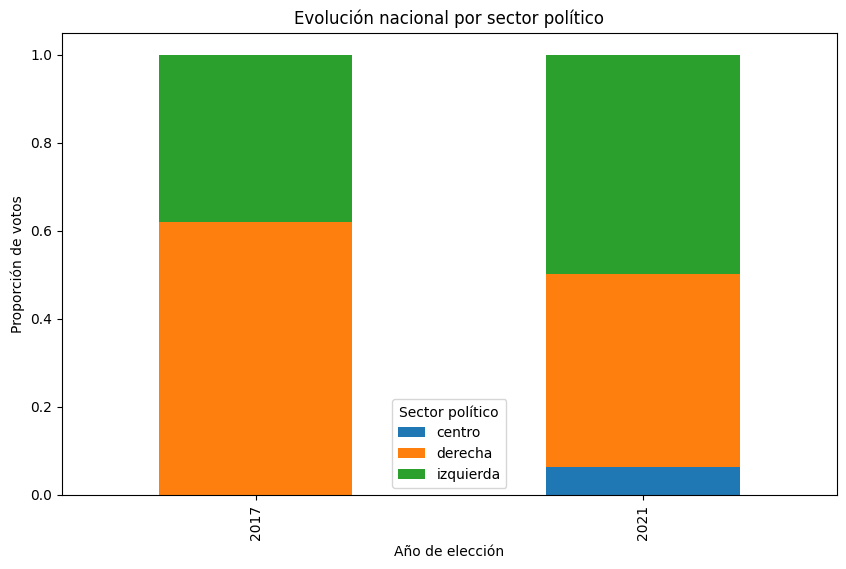

In [15]:
# Agrupar por año y sector (nivel país)
df_nacional = df_agg.groupby(["year", "sector"], as_index=False)["Votos"].sum()
df_total_nacional = df_nacional.groupby("year", as_index=False)["Votos"].sum().rename(columns={"Votos": "Votos_totales"})
df_nacional = df_nacional.merge(df_total_nacional, on="year")
df_nacional["share"] = df_nacional["Votos"] / df_nacional["Votos_totales"]

# Pivot para graficar fácilmente
pivot_nacional = df_nacional.pivot(index="year", columns="sector", values="share").fillna(0)

pivot_nacional.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Evolución nacional por sector político")
plt.xlabel("Año de elección")
plt.ylabel("Proporción de votos")
plt.legend(title="Sector político")
plt.show()
